In [1]:
!pip install seaborn --user

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [3]:
# Set visualization theme
sns.set()

# Load and tidy up the Data

In [4]:
data_set = pd.read_csv(r"C:\Users\TestimOni\OneDrive - Ulster University\Desktop\OptimumJewelryPricing\Data\Jewelry_Dataset.csv")
# df = pd.read_csv(r"C:\Users\TestimOni\OneDrive - Ulster University\Desktop\OptimumJewelryPricing\Data\Jewelry_Dataset.csv")

In [5]:
data_set.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [6]:
data_set.shape

(95910, 13)

In [7]:
# Set the columns for the data (df) for better readability using the provided dictionary
data_set.columns = [
    "Order_DateTime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category_Alias",
    "Brand_ID",
    "Price_in_USD",
    "User_ID",
    "Product_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"]

In [8]:
data_set.head()

,Order_DateTime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_Alias,Brand_ID,Price_in_USD,User_ID,Product_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


# Data Analysis

In [9]:
# check for and count missing values
data_set.isnull().sum()

Order_DateTime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category_Alias     9933
Brand_ID           4785
Price_in_USD       5352
User_ID            5352
Product_Gender    48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [10]:
# Check FEATURE CARDINALITY
data_set.nunique()

Order_DateTime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category_Alias      218
Brand_ID           2537
Price_in_USD       3166
User_ID           31079
Product_Gender        2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [11]:
# Statistical summary of the data
data_set.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_in_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [12]:
# also
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_DateTime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_Alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_in_USD    90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Product_Gender  47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [13]:
# Duplicate entries
data_set.duplicated().sum()

2589

In [14]:
data_set.shape

(95910, 13)

In [15]:
# DROP DUPLICATES
data_set = data_set.drop_duplicates()

In [16]:
# Confirm duplicate row dropping
data_set.shape

(93321, 13)

In [17]:
# Invarian features: Features with cadinality of 1
data_set.columns[data_set.nunique() <= 1].tolist()

['SKU_Quantity']

In [18]:
# Check for label (target feature) distribution
label_distribution = data_set["Price_in_USD"].skew()
label_distribution

18.919793378274285

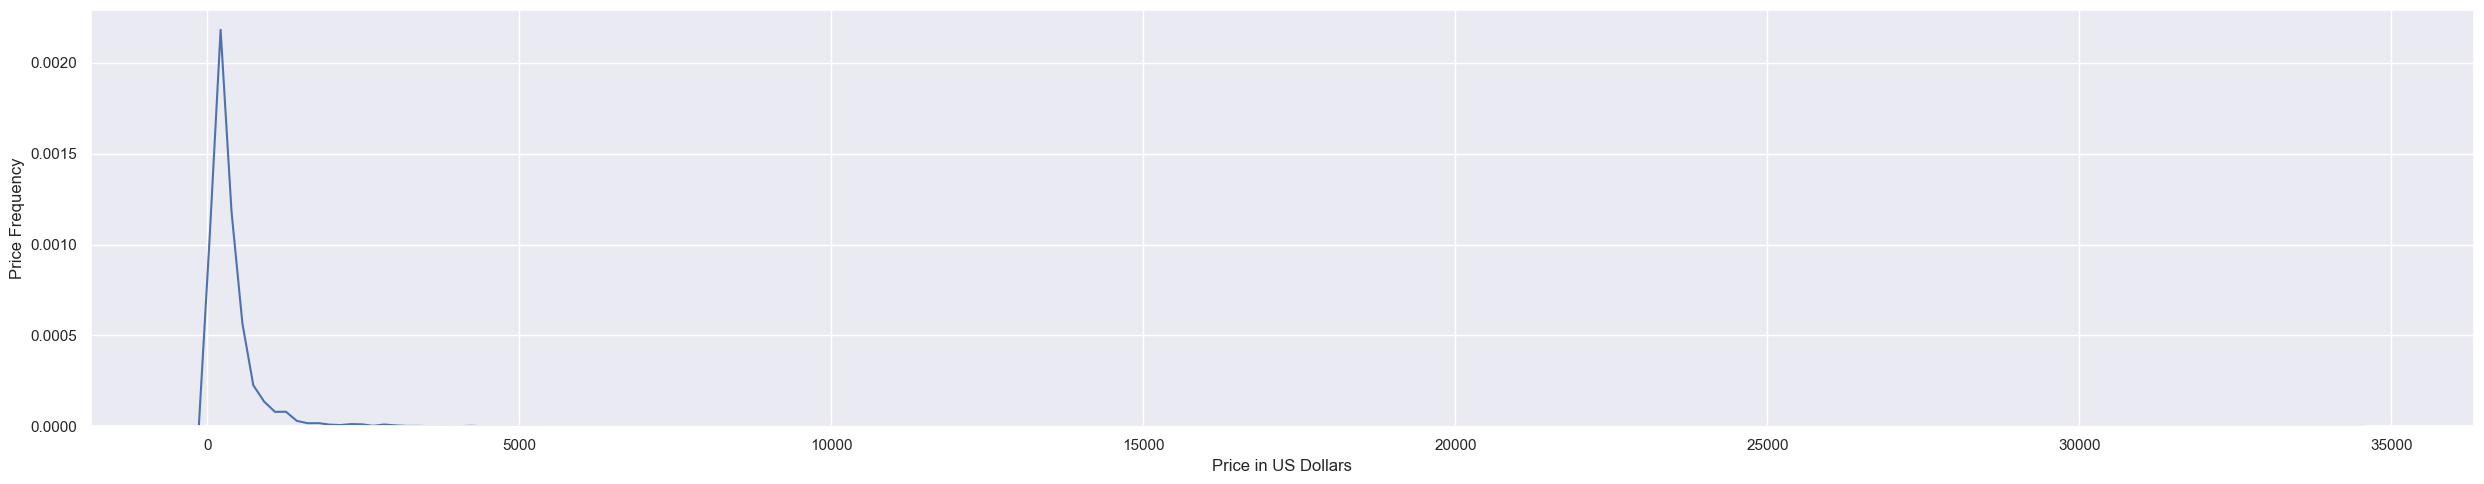

In [19]:
# The price (the label feature) in the data has a high skew.
# Let's visualize it
plt.figure(figsize = (25, 5))
sns.kdeplot(data = data_set, x = "Price_in_USD") # Kernel Density Estimate (KDE) Plot
plt.xlabel("Price in US Dollars")
plt.ylabel("Price Frequency")
plt.tight_layout()
plt.show(); plt.close()

In [20]:
# Price kurtosis
data_set["Price_in_USD"].kurtosis()

1044.1569649991407

<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

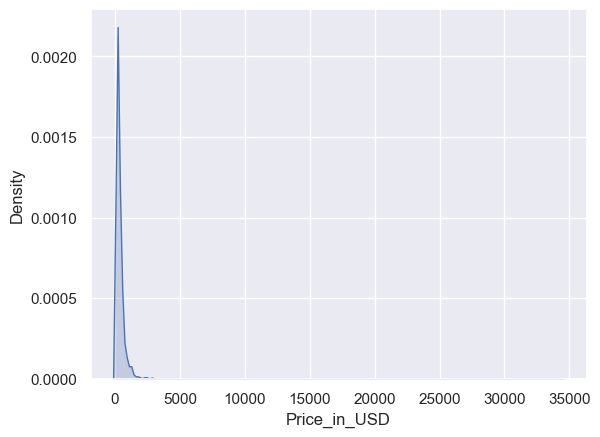

In [21]:
# Price Distribution
sns.kdeplot(data_set['Price_in_USD'], fill=True)

In [22]:
data_set['Price_in_USD'].describe()

count    88089.000000
mean       363.583797
std        448.344088
min          0.990000
25%        143.700000
50%        259.970000
75%        431.370000
max      34448.600000
Name: Price_in_USD, dtype: float64

In [23]:
# Target gender analysis
data_set["Product_Gender"].value_counts()

f    46687
m      359
Name: Product_Gender, dtype: int64

In [24]:
# In percentage
data_set["Product_Gender"].value_counts(normalize = True) * 100

f    99.236917
m     0.763083
Name: Product_Gender, dtype: float64

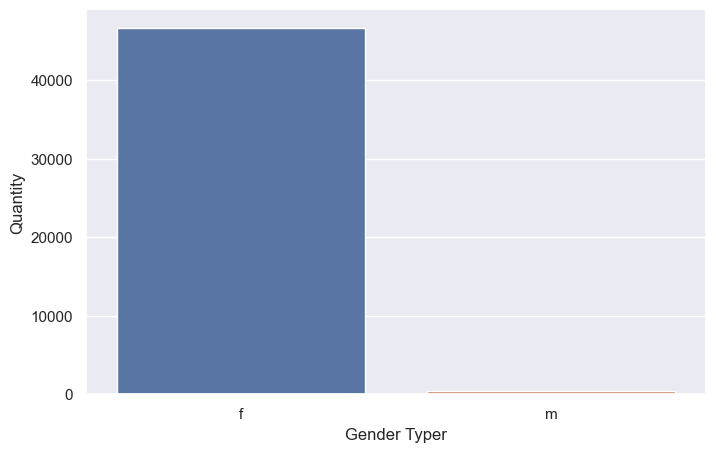

In [25]:
# Visualize gender distribution. Xtreme one-sided gender distribution
plt.figure(figsize = (8, 5))
sns.countplot(data = data_set, x = "Product_Gender")
plt.xlabel("Gender Typer")
plt.ylabel("Quantity")
plt.show(); plt.close()

In [26]:
# Jewelry Category analysis: We have 2 features pointing to categories: ID and ALIAS
data_set["Category_ID"].nunique()

25

In [27]:
data_set["Category_ID"].unique()

array([1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18,            nan, 1.80682920e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18])

In [28]:
data_set["Category_Alias"].nunique()

218

In [29]:
# From the above, we need to look deeper into the data.
# It doesn't look like the 'Category ID' (25) and 'Category ALIAS' (218) are pointing to the same data
data_set["Category_Alias"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [30]:
# Lets extract the actual categories by eliminating the corrupted ones
categories = data_set["Category_Alias"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]
print(categories, '\n\n', len(categories), 'unique categories.')

['jewelry.pendant', 'jewelry.necklace', 'jewelry.earring', 'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet', 'jewelry.souvenir', 'jewelry.stud'] 

 8 unique categories.


In [31]:
# Percentage of missing values in fields of the data set
data_set.isnull().sum() * 100 / len(data_set)

Order_DateTime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.606455
Category_Alias    10.541036
Brand_ID           5.009591
Price_in_USD       5.606455
User_ID            5.606455
Product_Gender    49.586910
Main_Color         7.797816
Main_Metal         5.721113
Main_Gem          34.756379
dtype: float64

In [32]:
data_set.shape

(93321, 13)

In [33]:
# Remove the corrupted categories and compare
data_set = data_set.loc[data_set["Category_Alias"].isin(categories)]
data_set.shape

(78087, 13)

In [34]:
# CATEGORY_ID Analysis
data_set["Category_ID"].nunique()

16

In [35]:
data_set["Category_ID"].unique()

array([1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.80682920e+18,
       1.80682920e+18, 1.80682920e+18, 1.80682920e+18, 1.31367763e+18,
       1.31367763e+18, 1.80682920e+18, 1.31367763e+18, 1.31367763e+18,
       1.31367763e+18, 1.31367763e+18, 1.31367763e+18, 1.31367763e+18])

In [36]:
# After triming, unique category alias and unique category ID are still not the same.
# The data integrity needs to be verified. A better, cleaner data set may be the way out.

In [37]:
# Percentage of missing values in fields of the trimed data set
data_set.isnull().sum() * 100 / len(data_set)

Order_DateTime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category_Alias     0.000000
Brand_ID           4.313138
Price_in_USD       0.000000
User_ID            0.000000
Product_Gender    44.018851
Main_Color         2.401168
Main_Metal         0.110134
Main_Gem          23.158784
dtype: float64

In [38]:
# The missing values reduced. It may mean that majority of the missing values are due to the Category data corruption

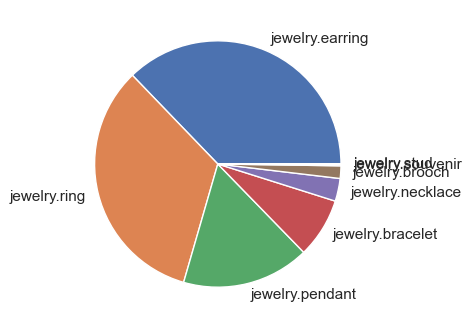

In [39]:
# Jewelry category distribution visualization
subdata = data_set["Category_Alias"].value_counts()
jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()
plt.figure(figsize = (6, 4))
plt.pie(x = counts, labels = jewelry_categories)
plt.show(); plt.close()

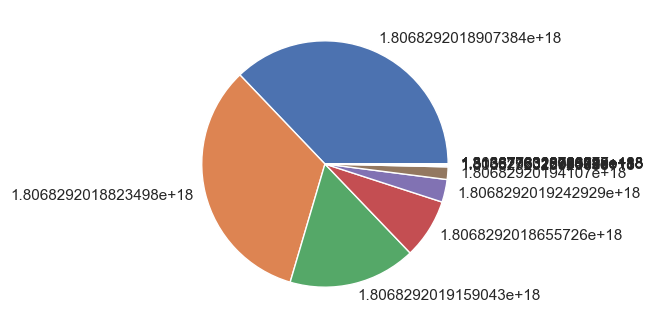

In [40]:
# Brand_ID
subdata = data_set["Category_ID"].value_counts()
jewelry_catIDs, counts = subdata.index.tolist(), subdata.values.tolist()
plt.figure(figsize = (6, 4))
plt.pie(x = counts, labels = jewelry_catIDs)
plt.show(); plt.close()

In [41]:
data_set["Category_Alias"].value_counts()

jewelry.earring     29047
jewelry.ring        26025
jewelry.pendant     13083
jewelry.bracelet     6129
jewelry.necklace     2335
jewelry.brooch       1286
jewelry.souvenir      170
jewelry.stud           12
Name: Category_Alias, dtype: int64

In [42]:
data_set["Category_ID"].value_counts()

1.806829e+18    28997
1.806829e+18    26011
1.806829e+18    13049
1.806829e+18     6126
1.806829e+18     2330
1.806829e+18     1286
1.806829e+18      170
1.313678e+18       40
1.313678e+18       25
1.313678e+18       14
1.806829e+18       12
1.313678e+18        9
1.313678e+18        9
1.313678e+18        5
1.313678e+18        3
1.313678e+18        1
Name: Category_ID, dtype: int64

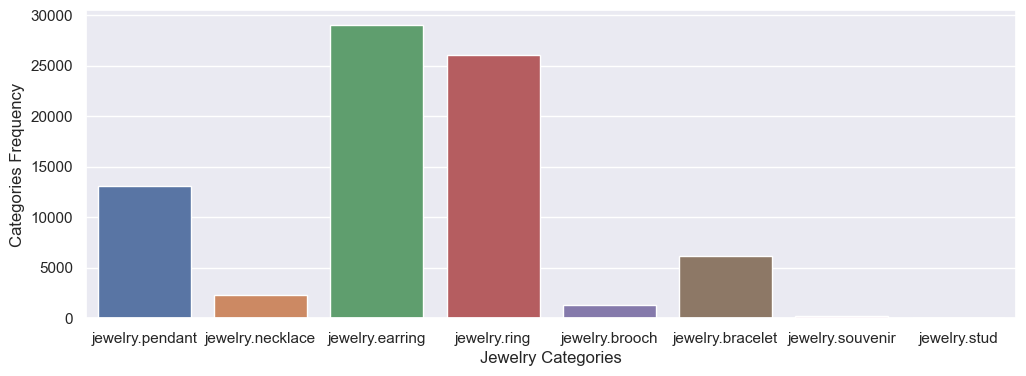

(None, <function matplotlib.pyplot.close(fig=None)>)

In [43]:
# Category count plot
plt.figure(figsize = (12, 4))
sns.countplot(data = data_set, x = "Category_Alias")
plt.xlabel("Jewelry Categories")
plt.ylabel("Categories Frequency")
plt.show(), plt.close

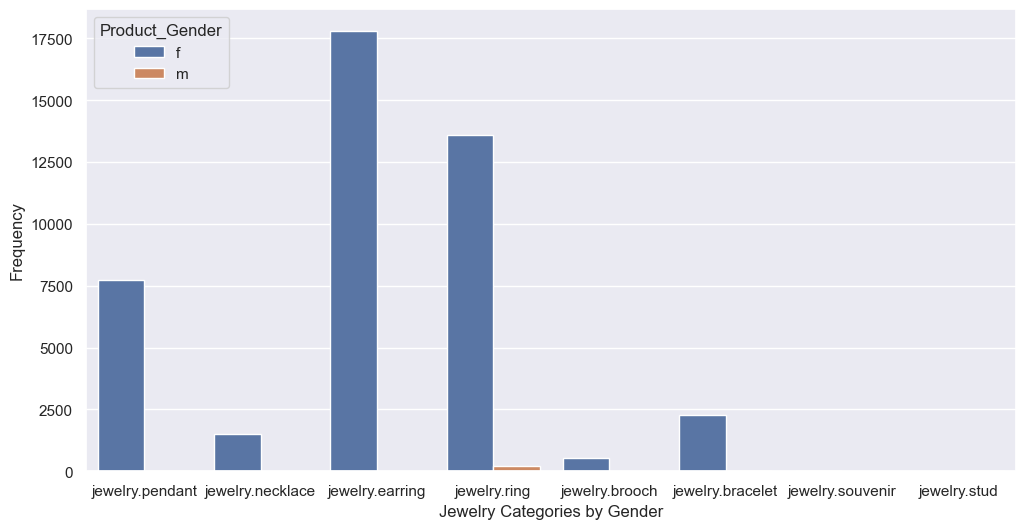

In [44]:
# Category representation with respect to gender
plt.figure(figsize = (12, 6))
sns.countplot(data = data_set, x = "Category_Alias", hue = "Product_Gender")
plt.xlabel("Jewelry Categories by Gender")
plt.ylabel("Frequency")
plt.show(); plt.close()

In [45]:
# Checking PRICE variation in unique PRODUCT_ID
for value in data_set["Product_ID"].unique():
    df = data_set[data_set["Product_ID"] == value]
    unique_prices = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Product_ID ", value, ", we have ", unique_prices, " unique prices.")

A UNIQUE PRODUCT_ID HAS A UNIQUE PRICE, drop Product_ID - inner invariant

In [46]:
# Checking PRICE variation in unique BRAND_ID
for value in data_set["Brand_ID"].unique():
    df = data_set[data_set["Brand_ID"] == value]
    unique_prices = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Brand_ID ", value, ", we have ", unique_prices, " unique prices.")

For Brand_ID  1.0 , we have  1673  unique prices.
For Brand_ID  0.0 , we have  665  unique prices.
For Brand_ID  2.0 , we have  447  unique prices.
For Brand_ID  4.0 , we have  18  unique prices.
For Brand_ID  5.0 , we have  4  unique prices.
For Brand_ID  3.0 , we have  31  unique prices.


In [47]:
# Checking PRICE variation in unique Category_ID
for value in data_set["Category_ID"].unique():
    df = data_set[data_set["Category_ID"] == value]
    unique_price = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Category_ID ", value, ", we have ", unique_prices, " unique prices.")

For Category_ID  1.8068292019159043e+18 , we have  31  unique prices.
For Category_ID  1.8068292019242929e+18 , we have  31  unique prices.
For Category_ID  1.8068292018907384e+18 , we have  31  unique prices.
For Category_ID  1.8068292018823498e+18 , we have  31  unique prices.
For Category_ID  1.80682920194107e+18 , we have  31  unique prices.
For Category_ID  1.8068292018655726e+18 , we have  31  unique prices.
For Category_ID  1.806829202092065e+18 , we have  31  unique prices.
For Category_ID  1.313677631878595e+18 , we have  31  unique prices.
For Category_ID  1.3136776318953723e+18 , we have  31  unique prices.
For Category_ID  1.8068292019746245e+18 , we have  31  unique prices.
For Category_ID  1.313677631836652e+18 , we have  31  unique prices.
For Category_ID  1.313677632264471e+18 , we have  31  unique prices.
For Category_ID  1.3136776319121495e+18 , we have  31  unique prices.
For Category_ID  1.3136776320799217e+18 , we have  31  unique prices.
For Category_ID  1.3136776

In [48]:
# Checking PRICE variation in unique Category_Alias
for value in data_set["Category_Alias"].unique():
    df = data_set[data_set["Category_Alias"] == value]
    unique_price = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Category_Alias ", value, ", we have ", unique_prices, " unique prices.")

For Category_Alias  jewelry.pendant , we have  31  unique prices.
For Category_Alias  jewelry.necklace , we have  31  unique prices.
For Category_Alias  jewelry.earring , we have  31  unique prices.
For Category_Alias  jewelry.ring , we have  31  unique prices.
For Category_Alias  jewelry.brooch , we have  31  unique prices.
For Category_Alias  jewelry.bracelet , we have  31  unique prices.
For Category_Alias  jewelry.souvenir , we have  31  unique prices.
For Category_Alias  jewelry.stud , we have  31  unique prices.


In [49]:
# Checking PRICE variation in unique Product_Gender
for value in data_set["Product_Gender"].unique():
    df = data_set[data_set["Product_Gender"] == value]
    unique_price = df["Price_in_USD"].nunique()
    if unique_prices > 1:
        print("For Product_Gender ", value, ", we have ", unique_prices, " unique prices.")

For Product_Gender  f , we have  31  unique prices.
For Product_Gender  nan , we have  31  unique prices.
For Product_Gender  m , we have  31  unique prices.


# Data Engineering

In [50]:
# Handling the skew in price - create 'log(pricd)' column
data_set["log_price"] = np.log1p(data_set["Price_in_USD"])

In [51]:
# log_price skew
data_set["log_price"].skew()

-0.34346031951381545

In [52]:
# DateTime analysis - see if price varies with month of the year
# Get YearOfOrder and OrderMonth from the DateTime column

# Ensure the column is parsed as datetime
data_set['Order_DateTime'] = pd.to_datetime(data_set['Order_DateTime'], utc=True)

# Create new columns for year and month
data_set['Year'] = data_set['Order_DateTime'].dt.year
data_set['Month'] = data_set['Order_DateTime'].dt.month

In [53]:
data_set["log_price"].describe()

count    78087.000000
mean         5.505135
std          0.868684
min          0.688135
25%          4.974663
50%          5.538475
75%          6.037083
max         10.447253
Name: log_price, dtype: float64

In [54]:
# log_price kurtosis
data_set["log_price"].kurtosis()

1.358418951547843

<AxesSubplot:xlabel='log_price', ylabel='Density'>

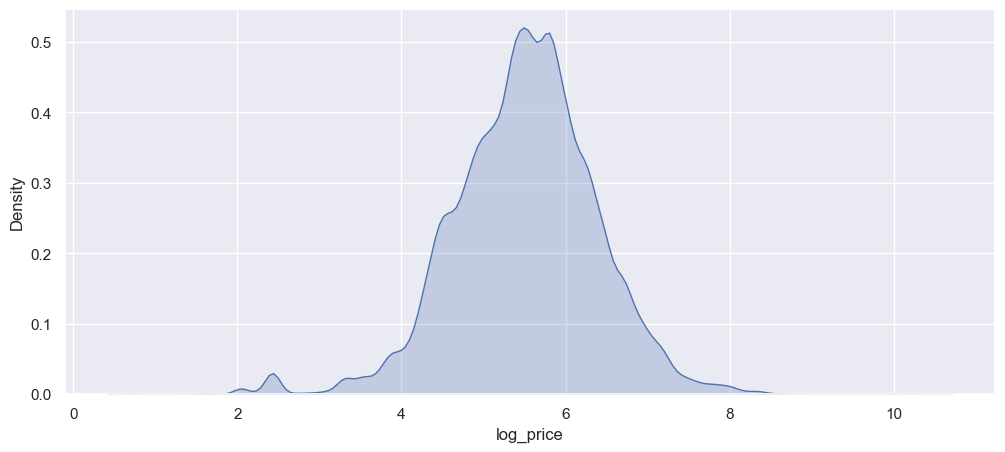

In [55]:
#log_price Distribution map
plt.figure(figsize = (12, 5))
sns.kdeplot(data_set['log_price'], fill=True)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

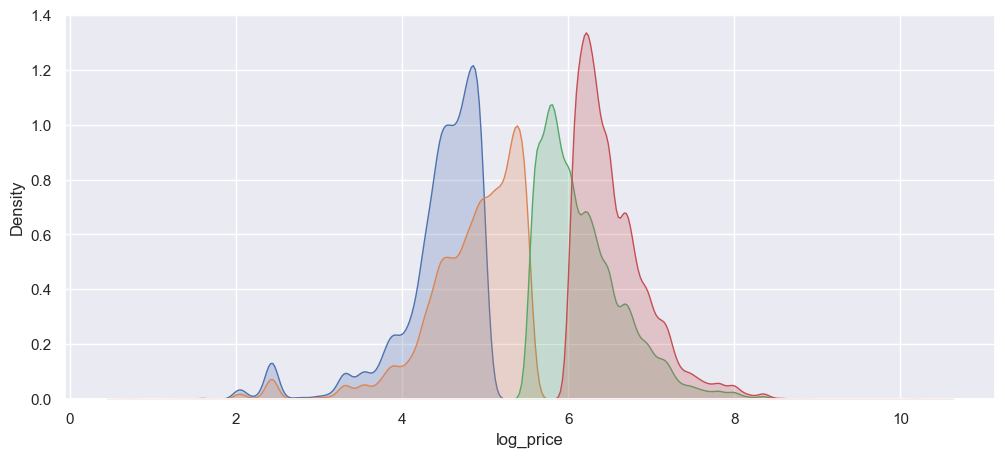

In [56]:
plt.figure(figsize = (12, 5))
sns.kdeplot(data_set['log_price'].loc[data_set['log_price'] <= 4.974663], fill=True)

sns.kdeplot(data_set['log_price'].loc[data_set['log_price'] <= 5.538475], fill=True)
sns.kdeplot(data_set['log_price'].loc[data_set['log_price'] > 5.538475], fill=True)

sns.kdeplot(data_set['log_price'].loc[data_set['log_price'] > 6.037083], fill=True)

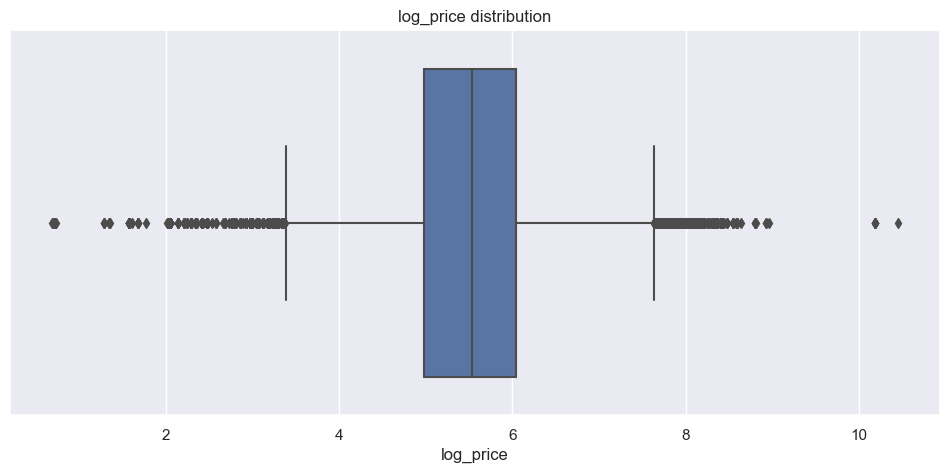

In [57]:
plt.figure(figsize = (12, 5))
sns.boxplot(x='log_price', data=data_set)
plt.title('log_price distribution')
plt.show(); plt.close()

In [58]:
data_set["Month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [59]:
data_set["Year"].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

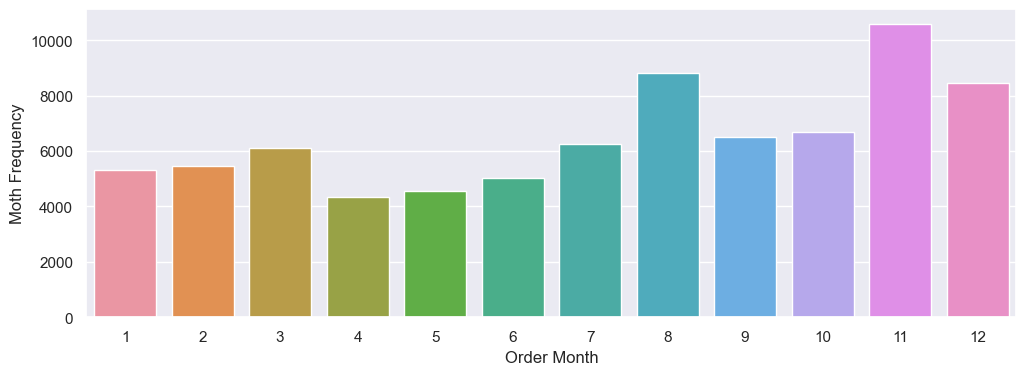

(None, <function matplotlib.pyplot.close(fig=None)>)

In [60]:
# Per month record count plot
plt.figure(figsize = (12, 4))
sns.countplot(data = data_set, x = "Month")
plt.xlabel("Order Month")
plt.ylabel("Moth Frequency")
plt.show(), plt.close

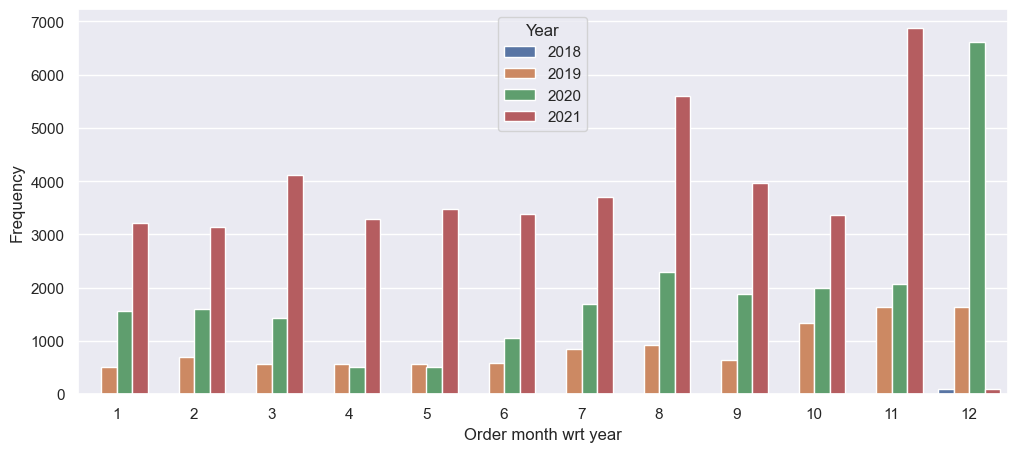

In [61]:
# Month variation with respect to years
plt.figure(figsize = (12, 5))
sns.countplot(data = data_set, x = "Month", hue = "Year")
plt.xlabel("Order month wrt year")
plt.ylabel("Frequency")
plt.show(); plt.close()

In [62]:
data_set.columns

Index(['Order_DateTime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category_Alias', 'Brand_ID', 'Price_in_USD', 'User_ID',
       'Product_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem', 'log_price',
       'Year', 'Month'],
      dtype='object')

In [63]:
# Let us drop the original DateTime record (year and month are the needed feature) and SKU_Quantity (Cadinality of 1)
# Drop Order ID,  User ID and Category_ID (Repetition of Category_Alias)
data_set = data_set.drop(["Order_DateTime", "Order_ID", "Product_ID", "SKU_Quantity", "Category_ID", "User_ID"], axis = 1)

In [64]:
# Remove recoerds where price is missed
# Drop rows with missing price_usd
data_set = data_set.dropna(subset=['Price_in_USD'])

In [65]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78087 entries, 1 to 95909
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category_Alias  78087 non-null  object 
 1   Brand_ID        74719 non-null  float64
 2   Price_in_USD    78087 non-null  float64
 3   Product_Gender  43714 non-null  object 
 4   Main_Color      76212 non-null  object 
 5   Main_Metal      78001 non-null  object 
 6   Main_Gem        60003 non-null  object 
 7   log_price       78087 non-null  float64
 8   Year            78087 non-null  int64  
 9   Month           78087 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 6.6+ MB


In [66]:
data_set["Brand_ID"].isnull().sum()

3368

In [67]:
# Impute 'unknown' for brand_id (convert NaNs to 'unknown')
data_set['Brand_ID'] = data_set['Brand_ID'].fillna('unknown')

In [68]:
data_set["Product_Gender"].unique()

array(['f', nan, 'm'], dtype=object)

In [69]:
# Impute 'unknown' for product_gender to get rid of missing values
data_set['Product_Gender'] = data_set['Product_Gender'].fillna('unknown')

In [70]:
# Replace 'unknown-color' and NaN in main_color with 'unknown'
data_set['Main_Color'] = data_set['Main_Color'].replace('unknown-color', 'unknown')
data_set['Main_Color'] = data_set['Main_Color'].fillna('unknown')

In [71]:
# For main_metal, replace NANs with 'unknown'
data_set['Main_Metal'] = data_set['Main_Metal'].fillna('unknown')

In [72]:
# For main_gem, replace NANs with 'none'
data_set['Main_Gem'] = data_set['Main_Gem'].fillna('none')

In [73]:
data_set.isnull().sum()

Category_Alias    0
Brand_ID          0
Price_in_USD      0
Product_Gender    0
Main_Color        0
Main_Metal        0
Main_Gem          0
log_price         0
Year              0
Month             0
dtype: int64

# Encoding strings as numerical features

In [74]:
encoded, category_code = pd.factorize(data_set["Category_Alias"]) # for categories
data_set.loc[:, "Category_Alias"] = encoded

encoded, category_code = pd.factorize(data_set["Brand_ID"]) # for categories
data_set.loc[:, "Brand_ID"] = encoded

encoded, category_code = pd.factorize(data_set["Product_Gender"]) # for genders
data_set.loc[:, "Product_Gender"] = encoded

encoded, category_code = pd.factorize(data_set["Main_Color"]) # for color
data_set.loc[:, "Main_Color"] = encoded

encoded, category_code = pd.factorize(data_set["Main_Metal"]) # for metal
data_set.loc[:, "Main_Metal"] = encoded

encoded, category_code = pd.factorize(data_set["Main_Gem"]) # for gem
data_set.loc[:, "Main_Gem"] = encoded

In [75]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78087 entries, 1 to 95909
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category_Alias  78087 non-null  int64  
 1   Brand_ID        78087 non-null  int64  
 2   Price_in_USD    78087 non-null  float64
 3   Product_Gender  78087 non-null  int64  
 4   Main_Color      78087 non-null  int64  
 5   Main_Metal      78087 non-null  int64  
 6   Main_Gem        78087 non-null  int64  
 7   log_price       78087 non-null  float64
 8   Year            78087 non-null  int64  
 9   Month           78087 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 6.6 MB


# DATA PREPARATION

In [76]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Define features (X) and target (y)
X = data_set[["Category_Alias", "Brand_ID", "Product_Gender", "Main_Color", "Main_Metal", "Main_Gem", "Year", "Month"]]
y = data_set["log_price"]

In [78]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Check all are encoded
print(X_train.dtypes)

Category_Alias    int64
Brand_ID          int64
Product_Gender    int64
Main_Color        int64
Main_Metal        int64
Main_Gem          int64
Year              int64
Month             int64
dtype: object


# Linear Regression

In [80]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Make predictions
y_pred = model.predict(X_test)

In [82]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5944160384035128
R² Score: 0.2179872369554382


In [83]:
# View coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -108.65910250522575
Coefficients: [ 0.20434005 -0.02687604 -0.12392791 -0.08018872 -1.95521215 -0.03673284
  0.05639286  0.01037961]


# Random Forest Regression

In [84]:
# use RandomForestClassifier for classification
from sklearn.ensemble import RandomForestRegressor  

In [85]:
# Initialize and Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # for regression
# model = RandomForestClassifier(n_estimators=100, random_state=42)  # for classification

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
# Make Predictions
y_pred = model.predict(X_test)

In [87]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.2736982406341071
R² Score: 0.6399230445168139


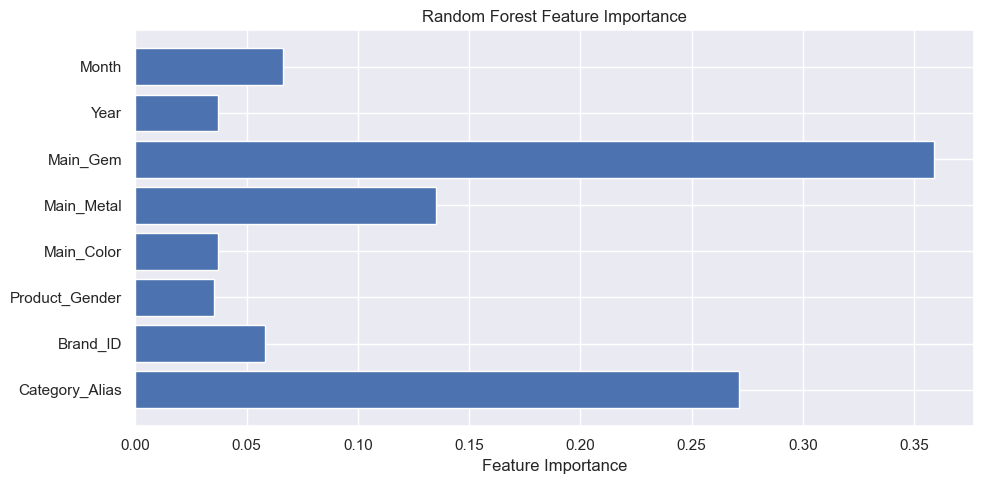

In [88]:
# Check Feature Importances

importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# XGBoost for ML Prediction (Regression)

In [89]:
# Install XGBoost
!pip install xgboost

In [90]:
# Use XGBClassifier for classification
from xgboost import XGBRegressor

In [91]:
# Initialize and Train the XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [92]:
# Make Predictions
y_pred = model.predict(X_test)

In [93]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.2996551943781356
R² Score: 0.6057741188382506


<Figure size 1000x600 with 0 Axes>

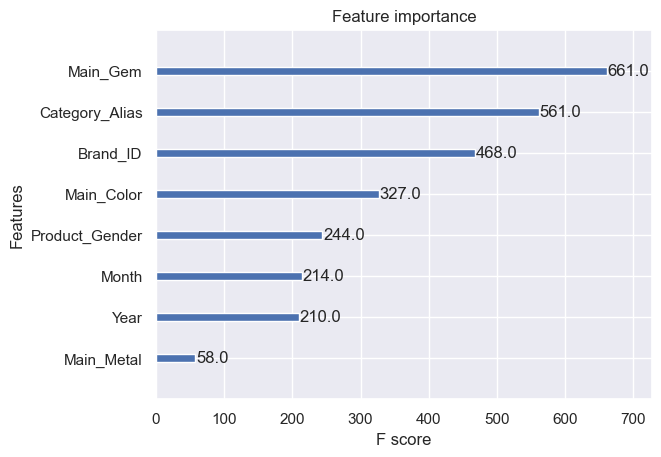

In [94]:
# Feature Importance
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model)
plt.show()

# In conclusion, Random Forest Regression performed better among the 3 modelling trategies.